# K-Nearest Neighbors

In [204]:
# Se importan las librerias a usar
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as pl
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

##  Sobre el conjunto de datos:  `diabetes.csv`

### Contexto

Este conjunto de datos es originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y del Riñón. El objetivo del conjunto de datos es predecir de manera diagnóstica si un paciente tiene o no diabetes, basándose en ciertas mediciones diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones en la selección de estas instancias de una base de datos más grande. En particular, todas las pacientes aquí son mujeres de al menos 21 años de edad, de herencia india Pima.

### Contenido
El conjunto de datos consiste en varias variables predictoras médicas y una variable objetivo, Resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, nivel de insulina, edad, entre otros.[Dataset source](https://www.kaggle.com/datasets/shantanudhakadd/diabetes-dataset-for-beginners/data)

In [205]:
# Se importa el archivo
df = pd.read_csv('diabetes.csv')
# visualizamos el df
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Verificamos si tenemos datos duplicados

In [206]:
# Contamos los valores duplicados
df.duplicated().value_counts()

False    768
Name: count, dtype: int64

Realizamos un Analisis Exploratorio de Datos (EDA) para entender mejor el conjunto de datos

In [207]:
# Verificamos el tipo de dato en las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [208]:
# Generamos estadísticas descriptivas para todas las columnas
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Se identifica lo siguiente: 
- Todas las columnas tienen 768 observaciones, lo que sugiere que no hay valores faltantes en tu conjunto de datos.
- la media de Pregnancies es aproximadamente 3.85, lo que sugiere que, en promedio, las mujeres en el conjunto de datos han tenido alrededor de 4 embarazos.
- la desviación estándar de Glucose es aproximadamente 31.97, lo que indica que los valores de glucosa tienden a variar alrededor de 32 unidades con respecto a la media.
- el valor mínimo de Glucose es 0, lo que parece ser un valor atípico o faltante.
- el percentil 25 de Age es 24, lo que indica que el 25% de las mujeres en el conjunto de datos tienen 24 años o menos.
- el valor máximo de Insulin es 846, lo que sugiere que hay mujeres en el conjunto de datos con niveles de insulina muy altos.

Visualización de las columnas mediante gráficos

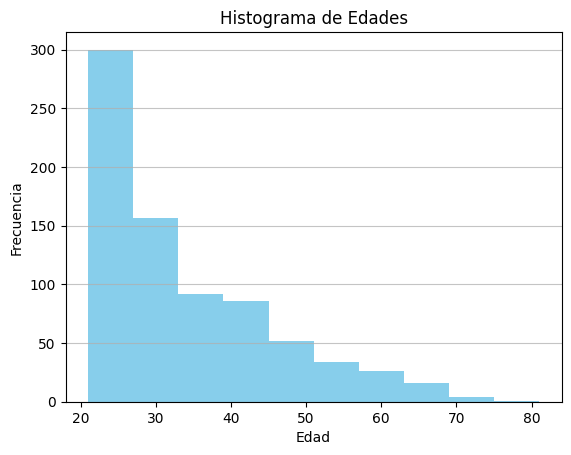

In [209]:
# Graficamos la variable Age
plt.hist(df['Age'], bins=10, color='skyblue')
plt.title('Histograma de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

Con este gráfico se confirma que el 50% de las personas en nuestro conjunto de datos tienen menos de 30 años.

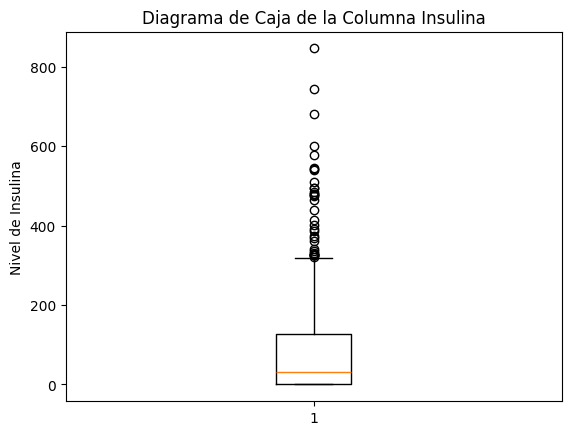

In [210]:
# Graficamos la variable Insulin
plt.boxplot(df['Insulin'])
plt.title('Diagrama de Caja de la Columna Insulina')
plt.ylabel('Nivel de Insulina')
plt.show()

Tener muchos valores atípicos podría significar que hay un subgrupo de pacientes con niveles de insulina muy altos en comparación con la mayoría de los pacientes en el conjunto de datos. Esto podría ser importante para el análisis, ya que los valores atípicos podrían tener un impacto significativo en los resultados del modelo.

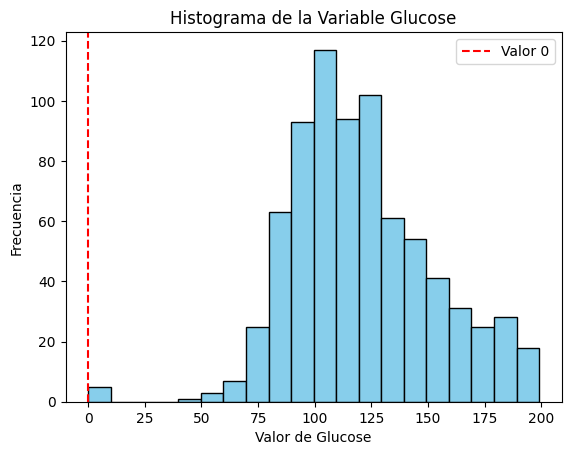

In [211]:
# Graficamos la variable Glucose
plt.hist(df['Glucose'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la Variable Glucose')
plt.xlabel('Valor de Glucose')
plt.ylabel('Frecuencia')
plt.axvline(x=0, color='red', linestyle='--', label='Valor 0')
plt.legend()
plt.show()

In [212]:
# Se filtra Glucose igual a cero
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


Es interesante notar la presencia de los casos con valor cero en la variable 'Glucose'. Esto podría indicar que esos valores son datos faltantes o errores en la recolección de datos. Sería importante investigar más a fondo la naturaleza de estos valores para determinar si deben ser excluidos o tratados de manera especial el análisis.

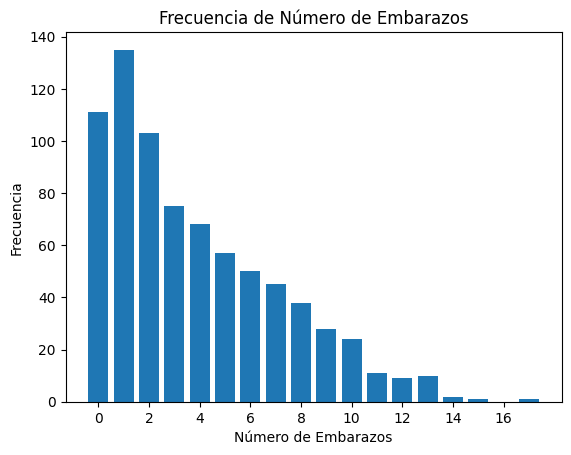

In [213]:
# Obtener la frecuencia de cada número de embarazos
conteo = df['Pregnancies'].value_counts().sort_index()

# Crear un gráfico de barras
plt.bar(conteo.index, conteo.values)

# Configurar el eje x para que vaya de 2 en 2
plt.xticks(range(0, max(conteo.index)+1, 2))

# Etiquetas y título
plt.xlabel('Número de Embarazos')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Número de Embarazos')

# Mostrar el gráfico
plt.show()

- La mayoría de las mujeres en el conjunto de datos parecen tener entre 0 y 5 embarazos, ya que estos números tienen las frecuencias más altas.
- A medida que el número de embarazos aumenta, la frecuencia tiende a disminuir, lo cual es esperado ya que es menos común tener un número muy alto de embarazos.
- Hay algunos valores únicos, como 14, 15 y 17 embarazos, que tienen frecuencias muy bajas. Estos podrían considerarse valores atípicos o simplemente casos raros en el conjunto de datos.

## Feature set

Para usar la biblioteca scikit-learn, tenemos que convertir el marco de datos de Pandas a un arreglo de Numpy:

In [214]:
# Seleccionamos nuestras variables predictoras
X = df[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness', 'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']].values
X[0:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [215]:
# Seleccionamos nuestra variable objetivo
y = df['Outcome'].values
y[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [216]:
# Se divide el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


<div id="classification">
    <h2>Classification</h2>
</div>
<h3>K nearest neighbor (KNN)</h3>


In [217]:
# Definimos K
k = 4
# Se entrena el modelo
knn = KNeighborsClassifier(n_neighbors= k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [218]:
# Se realiza la prediccion
ypred = knn.predict(X_test)
ypred[0:5]

array([0, 0, 0, 1, 0], dtype=int64)

Evaluación de la precisión

In [219]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, ypred))

Train set Accuracy:  0.8143322475570033
Test set Accuracy:  0.7532467532467533


La precisión en el conjunto de entrenamiento es del 81.43%. Esto significa que el modelo clasifica correctamente el 81.43% de las muestras en el conjunto de entrenamiento.

La precisión en el conjunto de prueba  es del 75.32%. Esto significa que el modelo clasifica correctamente el 75.32% de las muestras en el conjunto de prueba.

### Validación cruzada simple para definir el mejor K

In [220]:
# Definir el número máximo de vecinos a probar
Ks = 10

# Inicializar matrices para almacenar la precisión media y la desviación estándar de la precisión
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

# Bucle para probar diferentes valores de k
for n in range(1,Ks):
    
    # Entrenar el modelo y predecir  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    ypred=knn.predict(X_test)
    
    # Calcular y almacenar la precisión media
    mean_acc[n-1] = metrics.accuracy_score(y_test, ypred)

    # Calcular y almacenar la desviación estándar de la precisión
    std_acc[n-1]=np.std(ypred==y_test)/np.sqrt(ypred.shape[0])

# Imprimir la precisión media para cada valor de k
mean_acc


array([0.7012987 , 0.75974026, 0.73376623, 0.75324675, 0.72727273,
       0.76623377, 0.75324675, 0.75324675, 0.75324675])

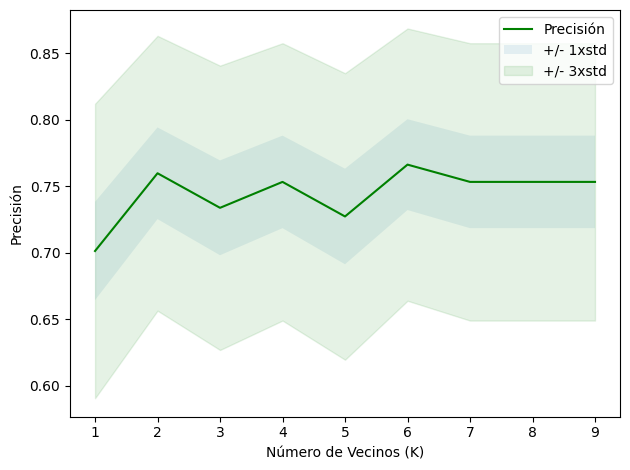

In [221]:
# Graficar la precisión media con el número de vecinos
plt.plot(range(1, Ks), mean_acc, 'g')
# Rellenar el área entre la precisión media menos una desviación estándar y la precisión media más una desviación estándar
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
# Rellenar el área entre la precisión media menos tres desviaciones estándar y la precisión media más tres desviaciones estándar
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color="green")
# Agregar leyendas
plt.legend(('Precisión', '+/- 1xstd', '+/- 3xstd'))
# Etiquetas de los ejes
plt.ylabel('Precisión')
plt.xlabel('Número de Vecinos (K)')
# Ajustar el diseño de la gráfica
plt.tight_layout()
# Mostrar la gráfica
plt.show()


La precisión varía ligeramente para cada valor de k, los valores de precisión están en el rango de aproximadamente 0.70 a 0.77, lo que indica que el modelo tiene un rendimiento moderado a bueno en general, no hay un valor de k claramente superior en términos de precisión. 

## Normalizar datos

In [161]:
# Se normalizan los datos
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.04154944],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 , -0.0204964 ]])

In [162]:
# Se divide el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (614, 8) (614,)
Test set: (154, 8) (154,)


In [164]:
# Definir el número máximo de vecinos a probar
Ks = 10

# Inicializar matrices para almacenar la precisión media y la desviación estándar de la precisión
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

# Bucle para probar diferentes valores de k
for n in range(1,Ks):
    
    # Entrenar el modelo y predecir  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    ypred=knn.predict(X_test)
    
    # Calcular y almacenar la precisión media
    mean_acc[n-1] = metrics.accuracy_score(y_test, ypred)

    # Calcular y almacenar la desviación estándar de la precisión
    std_acc[n-1]=np.std(ypred==y_test)/np.sqrt(ypred.shape[0])

# Imprimir la precisión media para cada valor de k
mean_acc


array([0.7012987 , 0.71428571, 0.74675325, 0.74025974, 0.74025974,
       0.72077922, 0.75974026, 0.75324675, 0.75324675])

El proyecto de clasificación utilizando el modelo KNN ha mostrado resultados prometedores. Con una precisión del 78.66% en el conjunto de entrenamiento y del 76.62% en el conjunto de prueba, el modelo ha demostrado una capacidad razonable para predecir la presencia o ausencia de diabetes en pacientes. Aunque la normalización de los datos no produjo mejoras significativas en el rendimiento, el modelo KNN resultó ser una elección sólida debido a su simplicidad y capacidad para manejar problemas de clasificación. 